In [9]:
import os
import joblib
import pandas as pd

# import GridSearch
from sklearn.model_selection import GridSearchCV

In [33]:
# list files in models, load them all as joblib
models = os.listdir('models')
grid_search_objects = []
for model in models:
    if model.endswith('.joblib'):
        grid_search_objects.append((model.split("_")[0], joblib.load(os.path.join('models', model))))

In [34]:
df = pd.DataFrame([(gs_obj[0], gs_obj[1].cv_results_) for gs_obj in grid_search_objects if isinstance(gs_obj[1], GridSearchCV)])

In [35]:
df = pd.concat([df, pd.DataFrame(list(df[1].values))], axis=1)

In [40]:
df.rename(columns={0: 'model'}, inplace=True)
df.drop(columns=[1], inplace=True)

In [41]:
df = df[[c for c in df.columns if "param_" not in c]]

In [50]:
df

,model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,RadiusNeighborsClassifier,"[0.0030114173889160155, 0.0021437644958496095,...","[0.001330232675790777, 0.0001842553693730964, ...","[0.2694840431213379, 0.015385055541992187, 0.0...","[0.5046524751456168, 0.0014792347882448737, 0....","[{'algorithm': 'auto', 'leaf_size': 10, 'metri...","[0.6573033707865169, 0.7359550561797753, 0.617...","[0.6741573033707865, 0.7921348314606742, 0.617...","[0.6629213483146067, 0.7528089887640449, 0.617...","[0.6348314606741573, 0.7415730337078652, 0.617...","[0.6497175141242938, 0.7062146892655368, 0.615...","[0.6557861994540721, 0.7457373198755792, 0.617...","[0.013165406459346642, 0.02784891335329204, 0....","[121, 1, 421, 241, 421, 401, 421, 361, 421, 38..."
1,SVC,"[0.03863468170166016, 0.0381317138671875, 0.03...","[0.0003579750473944068, 0.00026935445942954386...","[0.003017139434814453, 0.0029109954833984376, ...","[0.00010209498915937736, 7.66775204478576e-05,...","[{'C': 0.001, 'coef0': 0.1, 'degree': 2, 'gamm...","[0.6179775280898876, 0.6179775280898876, 0.617...","[0.6179775280898876, 0.6179775280898876, 0.617...","[0.6179775280898876, 0.6179775280898876, 0.617...","[0.6179775280898876, 0.6179775280898876, 0.617...","[0.615819209039548, 0.615819209039548, 0.61581...","[0.6175458642798197, 0.6175458642798197, 0.617...","[0.0008633276201358342, 0.0008633276201358342,...","[380, 380, 380, 380, 380, 380, 380, 380, 380, ..."
2,ComplementNB,"[0.002486896514892578, 0.003228282928466797, 0...","[0.0009282378118731393, 0.002142320580717349, ...","[0.0013342857360839843, 0.0013871192932128906,...","[0.00020683553638399096, 0.0002978741845349885...","[{'alpha': 0.1, 'fit_prior': True, 'norm': Tru...","[0.7471910112359551, 0.7640449438202247, 0.747...","[0.8033707865168539, 0.797752808988764, 0.8033...","[0.7865168539325843, 0.7752808988764045, 0.786...","[0.7528089887640449, 0.7528089887640449, 0.752...","[0.7909604519774012, 0.7740112994350282, 0.790...","[0.7761696184853678, 0.7727797879768932, 0.776...","[0.02214143752405792, 0.01487652028065502, 0.0...","[9, 17, 9, 17, 11, 17, 11, 17, 7, 15, 7, 15, 5..."
3,SVC,"[0.04527935981750488, 0.04434199333190918, 0.0...","[0.0004257954136684506, 0.0010087096736995569,...","[0.0030823230743408205, 0.0028009414672851562,...","[3.5516974940703e-05, 6.417030630865892e-05, 2...","[{'C': 1e-05, 'coef0': 10, 'degree': 5, 'gamma...","[0.6235955056179775, 0.8089887640449438, 0.820...","[0.6348314606741573, 0.8033707865168539, 0.814...","[0.6179775280898876, 0.7865168539325843, 0.814...","[0.6179775280898876, 0.7528089887640449, 0.769...","[0.615819209039548, 0.7966101694915254, 0.8079...","[0.6220402463022916, 0.7896591125499904, 0.805...","[0.0068956023640766, 0.019888529532132576, 0.0...","[3, 2, 1]"
4,RandomForestClassifier,"[0.44950308799743655, 0.17820401191711427, 0.0...","[0.7479022098143266, 0.010330045735367995, 0.0...","[0.010780048370361329, 0.022094202041625977, 0...","[0.00228331767847887, 0.001496190806888043, 0....","[{'max_depth': 9, 'max_features': 10, 'min_sam...","[0.8146067415730337, 0.8202247191011236, 0.820...","[0.8033707865168539, 0.8089887640449438, 0.808...","[0.8820224719101124, 0.8764044943820225, 0.887...","[0.8089887640449438, 0.8089887640449438, 0.820...","[0.8361581920903954, 0.8531073446327684, 0.836...","[0.8290293912270679, 0.8335428172411603, 0.834...","[0.028730088613158036, 0.026844250386916756, 0...","[146, 90, 80, 41, 115, 139, 117, 50, 95, 74, 1..."
5,BernoulliNB,"[0.0020082473754882814, 0.001954460144042969, ...","[0.0002147818432659071, 0.00012820320133424018...","[0.0025585651397705077, 0.0013131141662597657,...","[0.0021136858263676385, 4.666299291660464e-05,...","[{'alpha': 0.1, 'fit_prior': True}, {'alpha': ...","[0.797752808988764, 0.797752808988764, 0.79775...","[0.797752808988764, 0.797752808988764, 0.797

In [56]:
def get_idx_from_rank(rank: list):
    return rank.tolist().index(1)
df['index_of_best_model'] = df['rank_test_score'].map(get_idx_from_rank).copy()

/var/folders/sp/5tq3dcrn67s5cmtz82lhcq200000gn/T/ipykernel_3401/3289956824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_of_best_model'] = df['rank_test_score'].map(get_idx_from_rank).copy()


In [82]:
best_idxs = df['index_of_best_model']

def get_best_params(row, col_name):
    return row[col_name][row['index_of_best_model']]

df_best = pd.DataFrame()
for col in df.columns:
    if 'model' not in col and 'XX' not in col and 'index' not in col:
        df_best[col] = df.apply(lambda row: get_best_params(row, col), axis=1).copy()

df_best["model"] = df['model'].copy()

df_best = df_best[["model", *[c for c in df_best if c not in ["model", "index", "rank_test_score", "params"]]]]

df_best

,model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,RadiusNeighborsClassifier,0.002144,0.000184,0.015385,0.001479,0.735955,0.792135,0.752809,0.741573,0.706215,0.745737,0.027849
1,SVC,0.032509,0.000401,0.002262,0.000058,0.831461,0.825843,0.820225,0.792135,0.853107,0.824554,0.019669
2,ComplementNB,0.001529,0.000124,0.000963,0.000021,0.758427,0.792135,0.808989,0.758427,0.790960,0.781788,0.020112
3,SVC,0.051152,0.003609,0.002395,0.000026,0.820225,0.814607,0.814607,0.769663,0.807910,0.805402,0.018291
4,RandomForestClassifier,0.054583,0.004292,0.007719,0.000457,0.837079,0.814607,0.882022,0.820225,0.858757,0.842538,0.025020
5,BernoulliNB,0.001988,0.000208,0.001288,0.000038,0.797753,0.797753,0.786517,0.769663,0.774011,0.785139,0.011691
6,SVC,0.038790,0.001704,0.002402,0.000086,0.837079,0.820225,0.814607,0.780899,0.836158,0.817793,0.020428
7,MultinomialNB,0.001490,0.000068,0.000977,0.000029,0.775281,0.797753,0.775281,0.769663,0.779661,0.779528,0.009649
8,NuSVC,0.056595,0.001013,0.004493,0.000112,0.831461,0.820225,0.820225,0.792135,0.841808,0.821171,0.016593
9,KNeighborsClassifier,0.001974,0.000341,0.020235,0.009143,0.842697,0.808989,0.853933,0.792135,0.830508,0.825652,0.022427


In [96]:
df_best.columns

Index(['model', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score'],
      dtype='object')

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

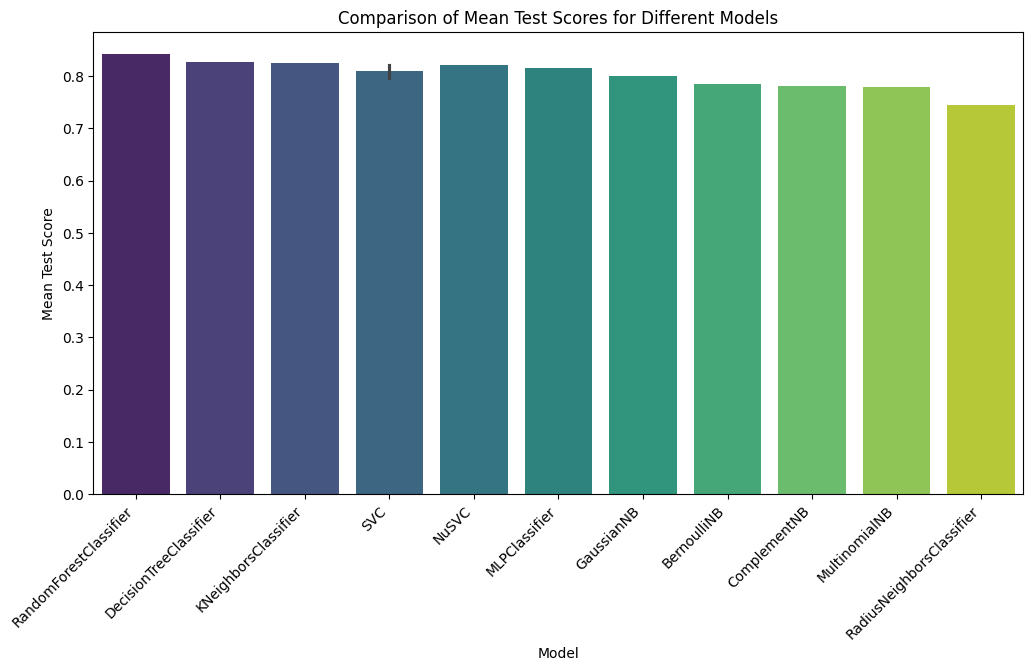

In [189]:
plot_data = df_best[['model', 'mean_test_score']].sort_values(
    by='mean_test_score', ascending=False)

# Create a vertical bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='mean_test_score', data=plot_data,
            hue='model', palette='viridis', dodge=False)
plt.title('Comparison of Mean Test Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45, ha='right')
plt.show()

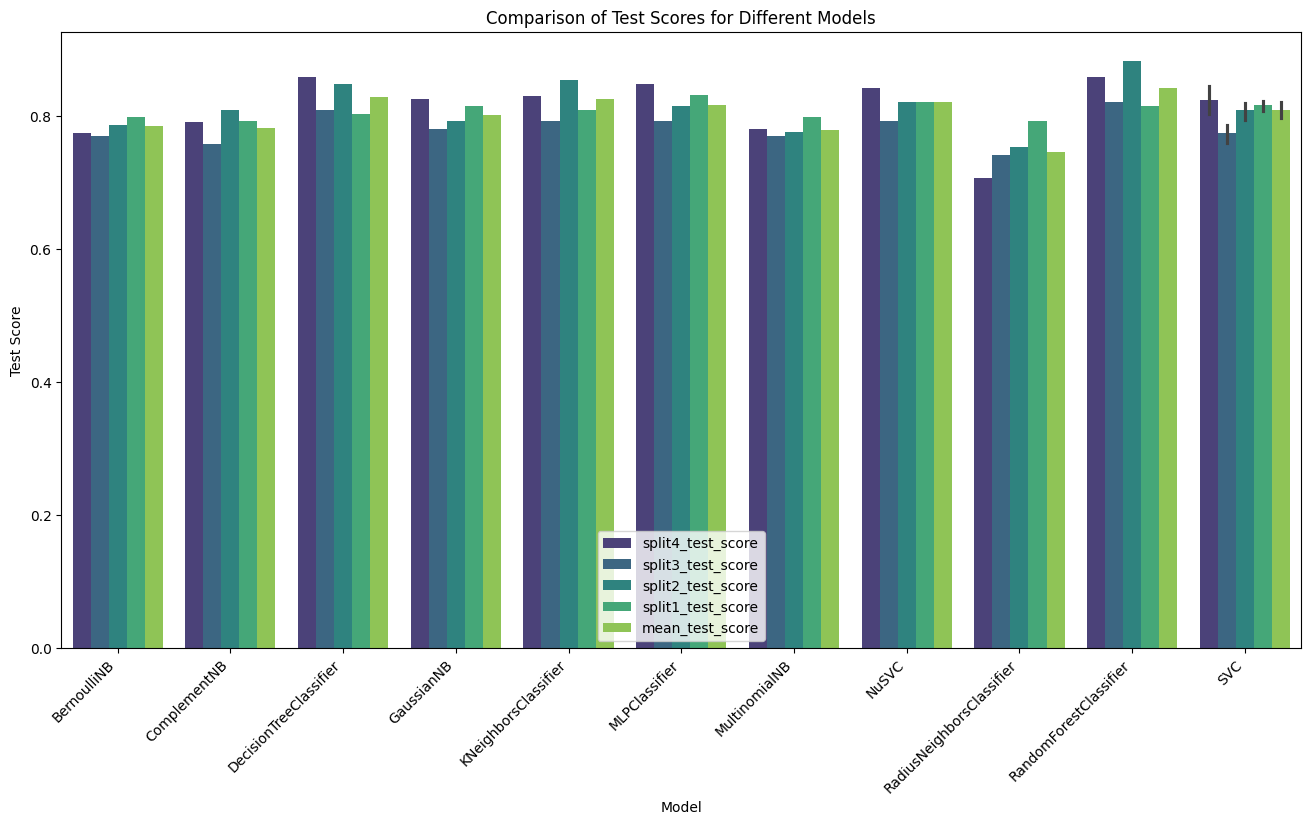

In [190]:
df_selected = df_best[['model', 'split1_test_score', 'split2_test_score',
                       'split3_test_score', 'split4_test_score', 'mean_test_score']]

# Melt the DataFrame to have a single column for different test scores
df_melted = df_selected.melt(
    id_vars='model', var_name='Test Score Type', value_name='Score')

# Sort the DataFrame by mean test score in descending order
df_melted_sorted = df_melted.sort_values(
    by=['model', 'Test Score Type'], ascending=[True, False])

# Create a vertical bar plot for the test scores
plt.figure(figsize=(16, 8))
sns.barplot(x='model', y='Score', hue='Test Score Type',
            data=df_melted_sorted, palette='viridis')
plt.title('Comparison of Test Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Test Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

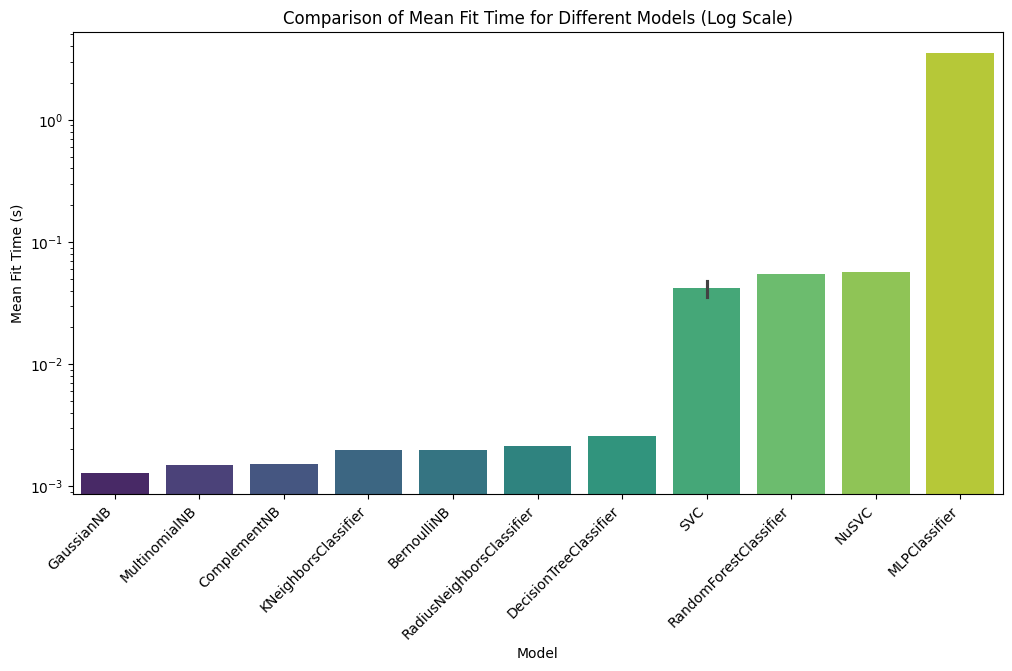

In [191]:
df_best_sorted = df_best.sort_values(by='mean_fit_time', ascending=True)

# Create a bar plot for the mean fit time on log scale
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='mean_fit_time', data=df_best_sorted,
            palette='viridis', hue='model')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Comparison of Mean Fit Time for Different Models (Log Scale)')
plt.xlabel('Model')
plt.ylabel('Mean Fit Time (s)')
plt.xticks(rotation=45, ha='right')
plt.show()

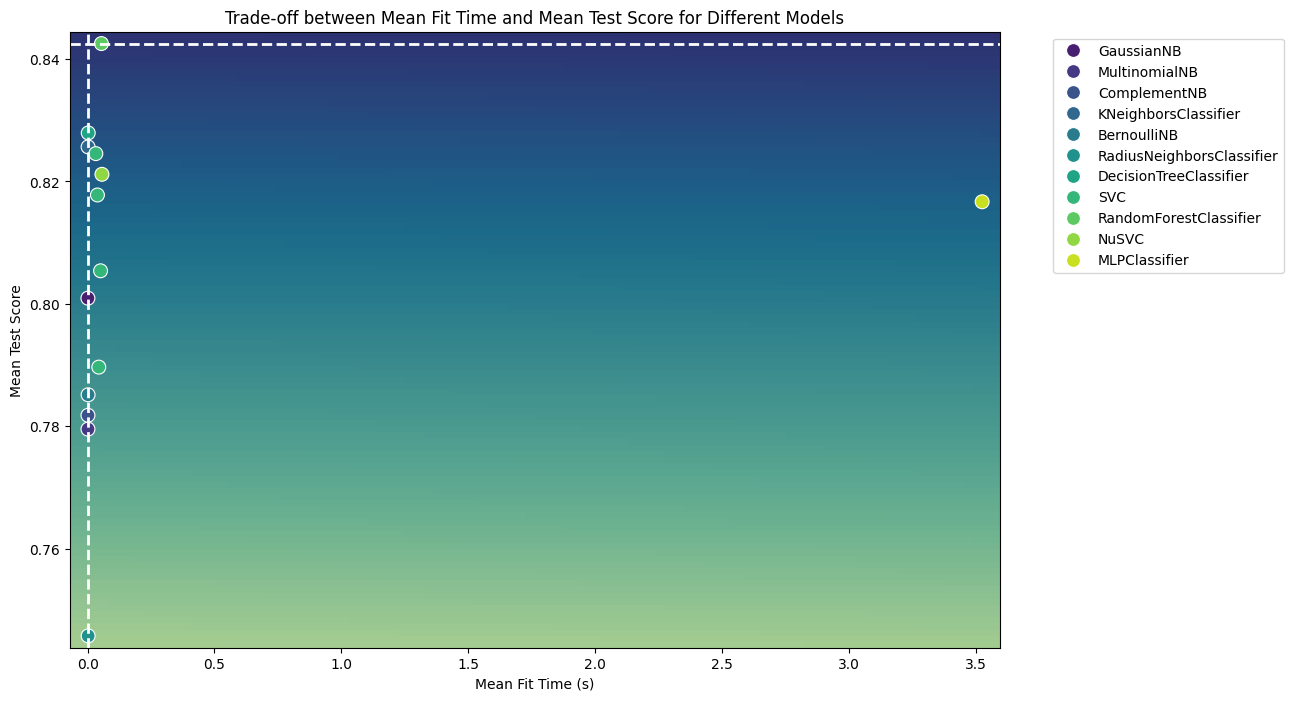

In [192]:
df_best_sorted = df_best.sort_values(by='mean_fit_time', ascending=True)

# Get the lowest and highest values of mean fit time and mean test score
min_fit_time = df_best_sorted['mean_fit_time'].min()
max_fit_time = df_best_sorted['mean_fit_time'].max()
min_test_score = df_best_sorted['mean_test_score'].min()
max_test_score = df_best_sorted['mean_test_score'].max()

# Add padding to the lowest and highest values
padding_fit_time = 0.02 * (max_fit_time - min_fit_time)
padding_test_score = 0.02 * (max_test_score - min_test_score)

# Create a trade-off graph between mean fit time and mean test score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mean_fit_time', y='mean_test_score',
                data=df_best_sorted, hue='model', palette='viridis', s=100)
plt.title('Trade-off between Mean Fit Time and Mean Test Score for Different Models')
plt.xlabel('Mean Fit Time (s)')
plt.ylabel('Mean Test Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add background gradient (cmap='crest') with respect to the lowest/highest values and padding
ax = plt.gca()
ax.imshow(np.flipud(np.arange(10000).reshape(100, 100)), cmap='crest',
          aspect='auto', extent=[min_fit_time - padding_fit_time, max_fit_time + padding_fit_time,
                                 min_test_score - padding_test_score, max_test_score + padding_test_score])

# Add optimal trade-off lines
ax.axhline(y=df_best_sorted['mean_test_score'].max(),
           color='white', linestyle='--', linewidth=2)
ax.axvline(x=df_best_sorted['mean_fit_time'].min(),
           color='white', linestyle='--', linewidth=2)

plt.show()

/var/folders/sp/5tq3dcrn67s5cmtz82lhcq200000gn/T/ipykernel_3401/1378463931.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.imshow(np.flipud(np.arange(10000).reshape(100, 100)), cmap='crest',


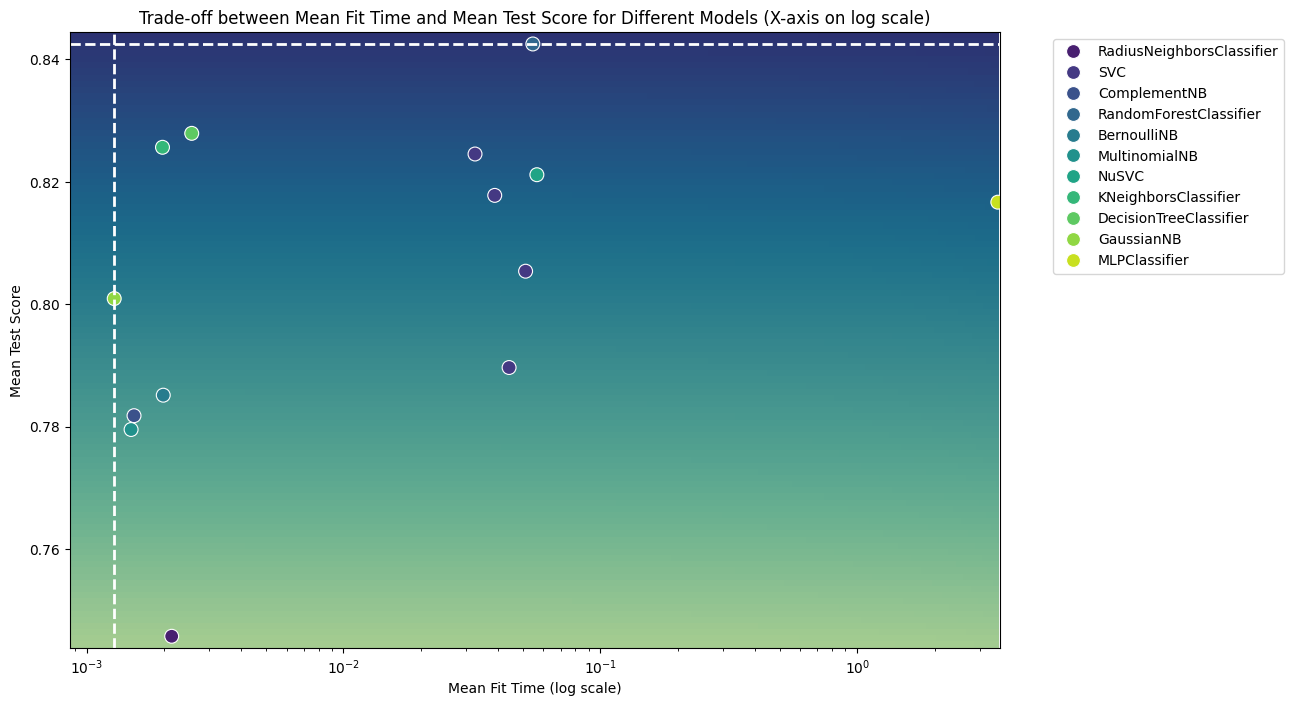

In [193]:
import numpy as np

min_fit_time = df_best['mean_fit_time'].min()
max_fit_time = df_best['mean_fit_time'].max()
min_test_score = df_best['mean_test_score'].min()
max_test_score = df_best['mean_test_score'].max()

# Add padding to the lowest and highest values
padding_fit_time = 0.02 * (max_fit_time - min_fit_time)
padding_test_score = 0.02 * (max_test_score - min_test_score)

# Create a trade-off graph between log mean fit time and mean test score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mean_fit_time', y='mean_test_score',
                data=df_best, hue='model', palette='viridis', s=100)
plt.xscale('log')  # Set x-axis to log scale
plt.title('Trade-off between Mean Fit Time and Mean Test Score for Different Models (X-axis on log scale)')
plt.xlabel('Mean Fit Time (log scale)')
plt.ylabel('Mean Test Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add background gradient (cmap='crest') with respect to the lowest/highest values and padding
ax = plt.gca()
ax.imshow(np.flipud(np.arange(10000).reshape(100, 100)), cmap='crest',
          aspect='auto', extent=[min_fit_time - padding_fit_time, max_fit_time + padding_fit_time,
                                 min_test_score - padding_test_score, max_test_score + padding_test_score])

# Add optimal trade-off lines
ax.axhline(y=df_best['mean_test_score'].max(),
           color='white', linestyle='--', linewidth=2)
ax.axvline(x=df_best['mean_fit_time'].min(),
           color='white', linestyle='--', linewidth=2)

plt.show()

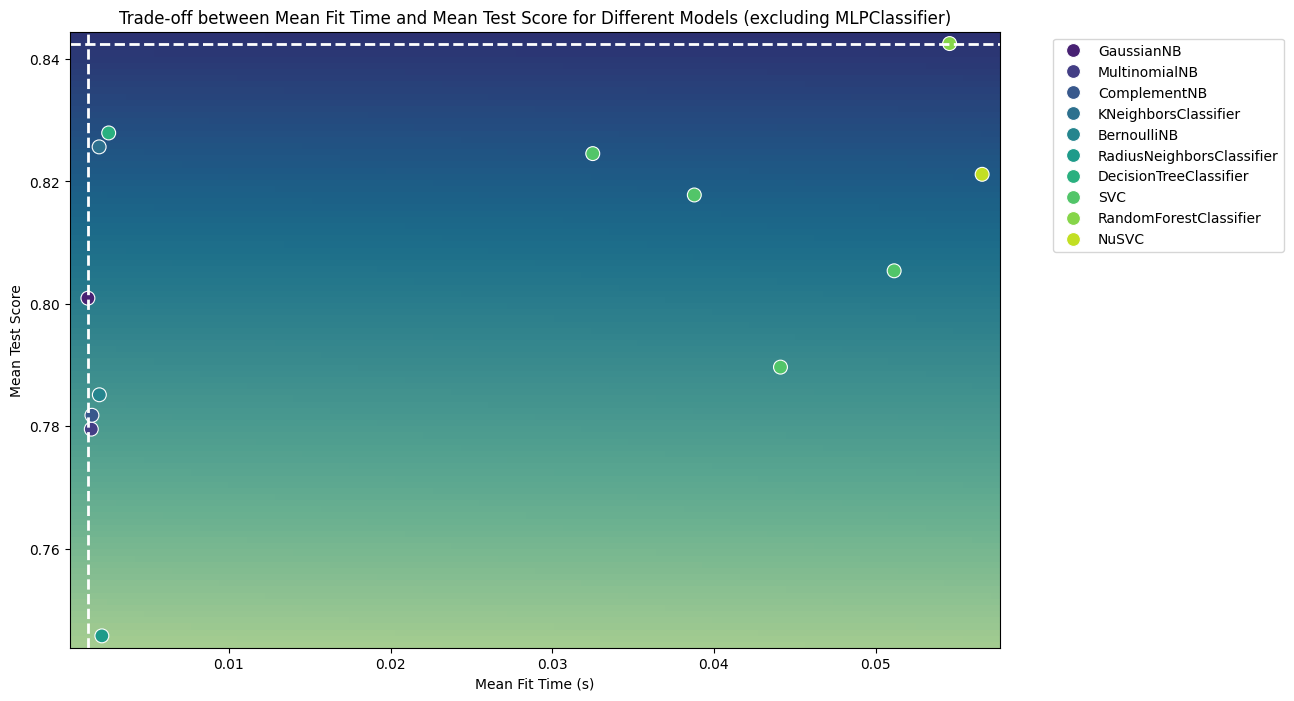

In [194]:
df_filtered = df_best_sorted[df_best_sorted['model'] != 'MLPClassifier']

# Get the lowest and highest values of mean fit time and mean test score
min_fit_time = df_filtered['mean_fit_time'].min()
max_fit_time = df_filtered['mean_fit_time'].max()
min_test_score = df_filtered['mean_test_score'].min()
max_test_score = df_filtered['mean_test_score'].max()

# Add padding to the lowest and highest values
padding_fit_time = 0.02 * (max_fit_time - min_fit_time)
padding_test_score = 0.02 * (max_test_score - min_test_score)

# Create a trade-off graph between mean fit time and mean test score (excluding MLPClassifier)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mean_fit_time', y='mean_test_score',
                data=df_filtered, hue='model', palette='viridis', s=100)
plt.title('Trade-off between Mean Fit Time and Mean Test Score for Different Models (excluding MLPClassifier)')
plt.xlabel('Mean Fit Time (s)')
plt.ylabel('Mean Test Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add background gradient (cmap='crest') with respect to the lowest/highest values and padding
ax = plt.gca()
ax.imshow(np.flipud(np.arange(10000).reshape(100, 100)), cmap='crest',
          aspect='auto', extent=[min_fit_time - padding_fit_time, max_fit_time + padding_fit_time,
                                 min_test_score - padding_test_score, max_test_score + padding_test_score])

# Add optimal trade-off lines
ax.axhline(y=df_filtered['mean_test_score'].max(),
           color='white', linestyle='--', linewidth=2)
ax.axvline(x=df_filtered['mean_fit_time'].min(),
           color='white', linestyle='--', linewidth=2)

plt.show()

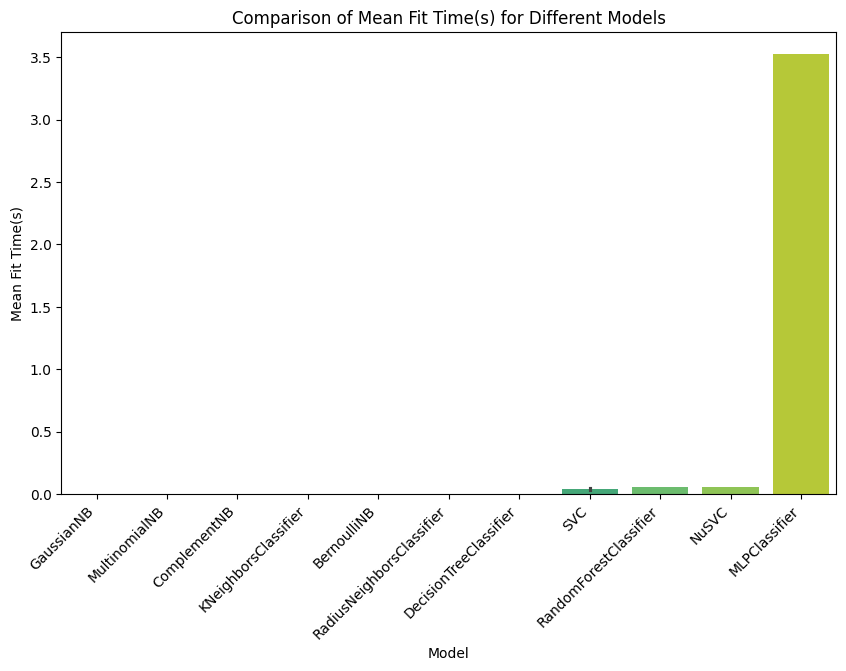

In [195]:
df_best_sorted = df_best.sort_values(by='mean_fit_time', ascending=True)

# Create a bar plot for the mean fit time
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='mean_fit_time', data=df_best_sorted,
            palette='viridis', hue='model')
plt.title('Comparison of Mean Fit Time(s) for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Fit Time(s)')
plt.xticks(rotation=45, ha='right')
plt.show()

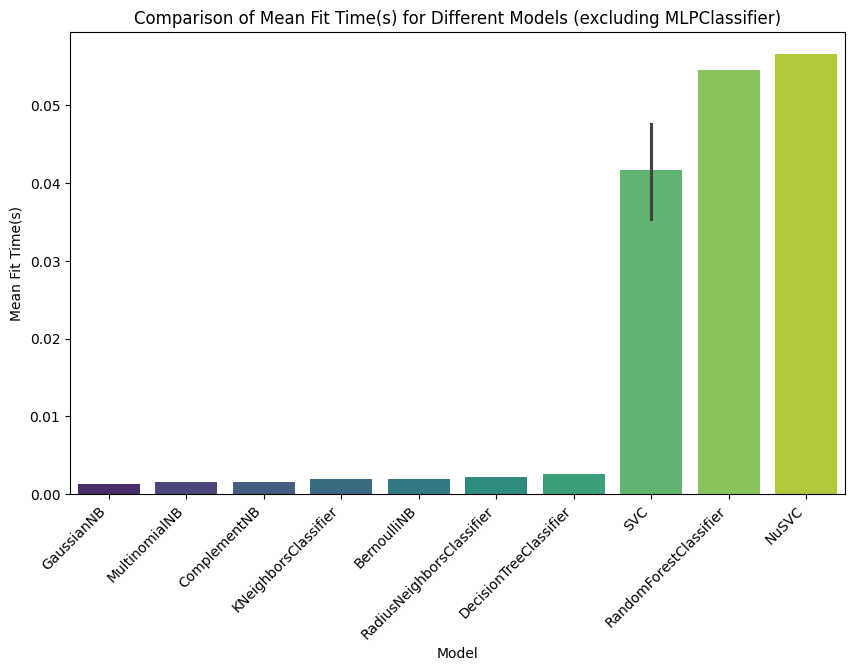

In [196]:
exclude_model = "MLPClassifier"
df_filtered = df_best[df_best["model"] != exclude_model]

# Sort the DataFrame by mean fit time in ascending order
df_filtered = df_filtered.sort_values(by='mean_fit_time', ascending=True)

# Create a bar plot for the mean fit time
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='mean_fit_time', data=df_filtered, palette='viridis', hue='model')
plt.title(
    f'Comparison of Mean Fit Time(s) for Different Models (excluding {exclude_model})')
plt.xlabel('Model')
plt.ylabel('Mean Fit Time(s)')
plt.xticks(rotation=45, ha='right')
plt.show()

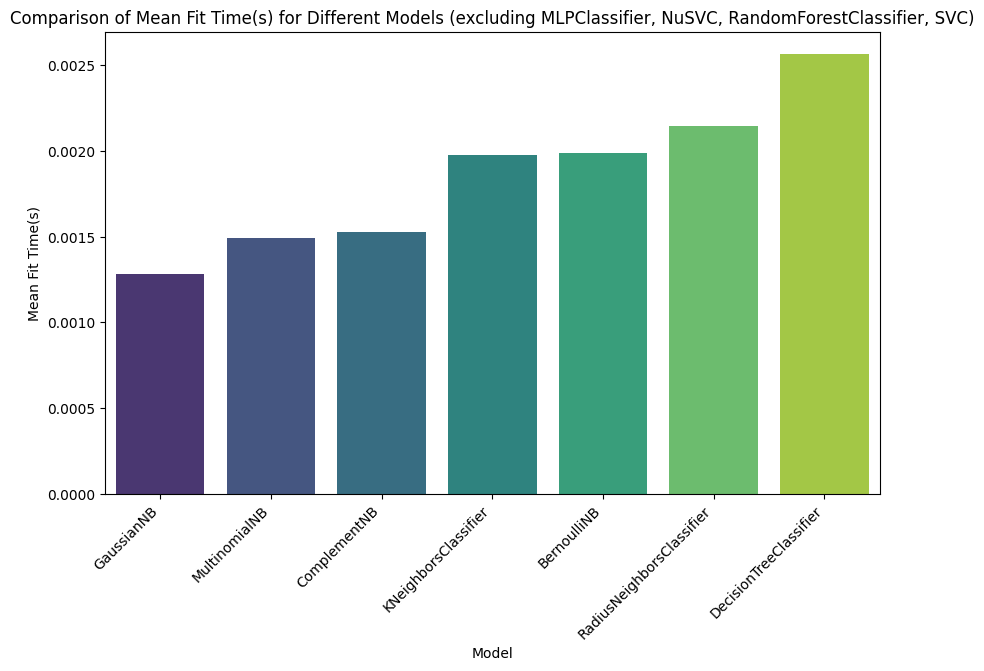

In [197]:
exclude_models = ["MLPClassifier", "NuSVC", "RandomForestClassifier", "SVC"]

# Filter out rows with specified models
df_filtered = df_best[~df_best["model"].isin(exclude_models)]

# Sort the DataFrame by mean fit time in ascending order
df_filtered = df_filtered.sort_values(by='mean_fit_time', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='mean_fit_time',
            data=df_filtered, palette='viridis', hue='model')
plt.title(
    f'Comparison of Mean Fit Time(s) for Different Models (excluding {", ".join(exclude_models)})')
plt.xlabel('Model')
plt.ylabel('Mean Fit Time(s)')
plt.xticks(rotation=45, ha='right')
plt.show()